In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
sns.set_theme()

In [178]:
vehicle_df = pd.read_csv('/Users/emilychen/Downloads/csv/vehpub.csv')
household_df = pd.read_csv('/Users/emilychen/Downloads/csv/hhpub.csv')

In [179]:
vehicle_df.head()

,HOUSEID,VEHID,VEHYEAR,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,...,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
0,30000007,1,2007,10,49,49032,1,1,3,69000,...,750,20,750,300,487.064221,1126.457778,30,-9,2.31275,1
1,30000007,2,2004,13,49,49442,1,2,-8,164000,...,750,20,750,300,250.899523,580.267873,19,-9,2.31275,1
2,30000007,3,1998,19,19,19014,1,1,1,120000,...,750,20,750,300,444.462475,1027.930589,18,-9,2.31275,1
3,30000007,4,1997,20,19,19021,1,1,2,-88,...,750,20,750,300,40.329575,93.272224,18,-9,2.31275,1
4,30000007,5,1993,24,20,20481,1,4,2,300000,...,750,20,750,300,888.404197,2054.656806,14,-9,2.31275,1


In [5]:
household_df.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,2,3,1,3,5,7,2,1,2,...,2,187.314320,T,50,1500,750,750,20,750,300
1,30000008,5,2,1,2,4,8,1,1,2,...,2,69.513032,R,5,300,300,150,5,300,300
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
3,30000019,5,3,1,2,2,3,1,5,5,...,2,279.143588,S,40,300,300,150,50,750,300
4,30000029,3,3,1,2,2,5,2,5,1,...,2,103.240304,S,40,1500,750,750,40,1500,750


In [6]:
print(household_df.shape)
print(vehicle_df.shape)

(129696, 58)
(256115, 60)


## Missing Values

In [7]:
vehicle_df.isnull().sum()

HOUSEID      0
VEHID        0
VEHYEAR      0
VEHAGE       0
MAKE         0
MODEL        0
FUELTYPE     0
VEHTYPE      0
WHOMAIN      0
OD_READ      0
HFUEL        0
VEHOWNED     0
VEHOWNMO     0
ANNMILES     0
HYBRID       0
PERSONID     0
TRAVDAY      0
HOMEOWN      0
HHSIZE       0
HHVEHCNT     0
HHFAMINC     0
DRVRCNT      0
HHSTATE      0
HHSTFIPS     0
NUMADLT      0
WRKCOUNT     0
TDAYDATE     0
LIF_CYC      0
MSACAT       0
MSASIZE      0
RAIL         0
URBAN        0
URBANSIZE    0
URBRUR       0
CENSUS_D     0
CENSUS_R     0
CDIVMSAR     0
HH_RACE      0
HH_HISP      0
HH_CBSA      0
SMPLSRCE     0
WTHHFIN      0
BESTMILE     0
BEST_FLG     0
BEST_EDT     0
BEST_OUT     0
HBHUR        0
HTHTNRNT     0
HTPPOPDN     0
HTRESDN      0
HTEEMPDN     0
HBHTNRNT     0
HBPPOPDN     0
HBRESDN      0
GSYRGAL      0
GSTOTCST     0
FEGEMPG      0
FEGEMPGA     0
GSCOST       0
FEGEMPGF     0
dtype: int64

In [8]:
household_df.isnull().sum()

HOUSEID       0
TRAVDAY       0
SAMPSTRAT     0
HOMEOWN       0
HHSIZE        0
HHVEHCNT      0
HHFAMINC      0
PC            0
SPHONE        0
TAB           0
WALK          0
BIKE          0
CAR           0
TAXI          0
BUS           0
TRAIN         0
PARA          0
PRICE         0
PLACE         0
WALK2SAVE     0
BIKE2SAVE     0
PTRANS        0
HHRELATD      0
DRVRCNT       0
CNTTDHH       0
HHSTATE       0
HHSTFIPS      0
NUMADLT       0
YOUNGCHILD    0
WRKCOUNT      0
TDAYDATE      0
HHRESP        0
LIF_CYC       0
MSACAT        0
MSASIZE       0
RAIL          0
URBAN         0
URBANSIZE     0
URBRUR        0
SCRESP        0
CENSUS_D      0
CENSUS_R      0
CDIVMSAR      0
HH_RACE       0
HH_HISP       0
HH_CBSA       0
RESP_CNT      0
WEBUSE17      0
SMPLSRCE      0
WTHHFIN       0
HBHUR         0
HTHTNRNT      0
HTPPOPDN      0
HTRESDN       0
HTEEMPDN      0
HBHTNRNT      0
HBPPOPDN      0
HBRESDN       0
dtype: int64

### Variables of Interest
BESTMILE - Best estimate of annual miles

LIF_CYC - Life Cycle classification for the household, derived by attributes pertaining to age, relationship, and work status.

HTRESDN - Category of housing units per square mile in the census tract of the household's home location

HTEEMPDN - Category of workers per square mile in the census tract of the household's home location

HTPPOPDN - Category of population density (persons per square mile) in the census tract of the household's home location

HBRESDN - Category of housing units per square mile in the census block of the household's home location

HBEEMPDN - Category of workers per square mile in the census block of the household's home location

HBPPOPDN - Category of population density (persons per square mile) in the census block of the household's home location

HHFAMINC - Household income

HHSIZE - Household size

## Univariate Analysis

In [9]:
vehicle_df.describe()

,HOUSEID,VEHID,VEHYEAR,VEHAGE,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,HFUEL,VEHOWNED,...,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
count,2.561150e+05,256115.000000,256115.000000,256115.000000,256115.000000,256115.000000,256115.000000,2.561150e+05,256115.000000,256115.000000,...,256115.000000,256115.000000,256115.000000,256115.000000,256115.000000,256115.000000,256115.000000,256115.000000,256115.000000,256115.000000
mean,3.505186e+07,1.839627,1993.019519,10.356992,1.140671,2.644574,3.477297,7.469966e+04,-0.829288,1.102267,...,1196.739605,23.771388,3354.980044,1504.728399,508.567328,1220.622605,22.680276,-8.808851,2.153494,1.179458
std,5.054880e+06,1.098090,164.613401,8.187607,2.673152,5.606761,13.803154,7.252014e+04,2.573373,0.698290,...,1412.887347,20.435021,4666.319156,2679.859002,583.308377,1398.322704,8.879565,4.437272,1.747156,0.531909
min,3.000001e+07,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.800000e+01,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,6.000000,-9.000000,-9.000000,1.000000
25%,3.026204e+07,1.000000,2003.000000,4.000000,1.000000,1.000000,1.000000,1.251450e+04,-1.000000,1.000000,...,75.000000,5.000000,300.000000,300.000000,196.485954,472.697102,18.000000,-9.000000,2.266500,1.000000
50%,3.052724e+07,2.000000,2008.000000,9.000000,1.000000,2.000000,1.000000,5.959700e+04,-1.000000,1.000000,...,750.000000,20.000000,1500.000000,750.000000,396.186947,950.206434,21.000000,-9.000000,2.312750,1.000000
75%,4.037127e+07,2.000000,2013.000000,14.000000,1.000000,3.000000,2.000000,1.181775e+05,-1.000000,1.000000,...,1500.000000,30.000000,7000.000000,1500.000000,662.736377,1587.311092,25.000000,-9.000000,2.465333,1.000000
max,4.079430e+07,12.000000,2017.000000,40.000000,97.000000,97.000000,97.000000,4.000000e+06,97.000000,2.000000,...,5000.000000,95.000000,30000.000000,30000.000000,33333.333333,78897.222222,124.000000,133.000000,9.858750,3.000000


What are the most common household income brackets of respondents?

Text(0.5, 1.0, 'Most Common Household Annual Incomes')

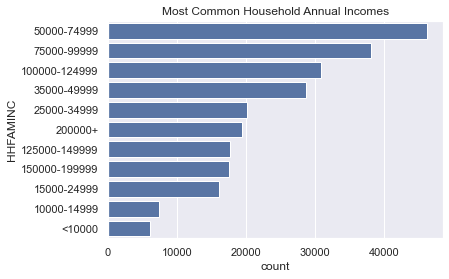

In [68]:
income_dict = {1: '<10000', 2: '10000-14999',
    3: '15000-24999', 4: '25000-34999',
    5: '35000-49999', 6: '50000-74999',
    7: '75000-99999', 8: '100000-124999',
    9: '125000-149999', 10: '150000-199999',
    11: '200000+'
}
vehicle_count = vehicle_df[vehicle_df['HHFAMINC']>0]['HHFAMINC'].replace(income_dict).value_counts().reset_index()
sns.barplot(data = vehicle_count, x = 'count', y = 'HHFAMINC')
plt.title('Most Common Household Annual Incomes')

What are the most common household sizes?

Text(0.5, 1.0, 'Most Common Household Sizes')

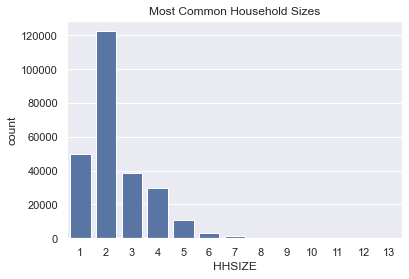

In [69]:
hh_size_count = vehicle_df['HHSIZE'].value_counts().reset_index()
sns.barplot(data = hh_size_count, x = 'HHSIZE', y = 'count')
plt.title('Most Common Household Sizes')

What is the distribution of estimate annual miles?

In [198]:
filtered_miles = vehicle_df[vehicle_df['BESTMILE'] >= 0]
filtered_miles['BESTMILE'].describe()

count    252092.000000
mean      10554.333263
std       10879.414314
min           0.000000
25%        4418.714808
50%        8569.920026
75%       13853.627398
max      200000.000000
Name: BESTMILE, dtype: float64

Text(0.5, 1.0, 'Distribution of Estimated Annual Miles')

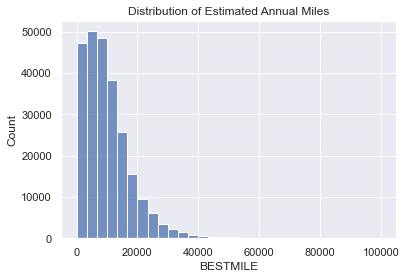

In [196]:
sns.histplot(vehicle_df['BESTMILE'], bins = 30, binrange=(0,100000))
plt.title('Distribution of Estimated Annual Miles')

Text(0.5, 1.0, 'Category of Workers per Square Mile in Household Location')

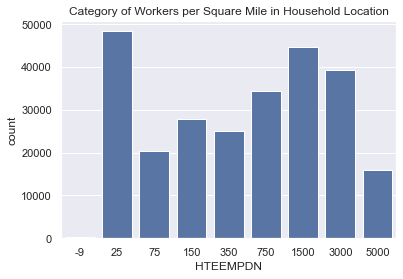

In [78]:
num_workers = vehicle_df['HTEEMPDN'].value_counts().reset_index()
sns.barplot(data = num_workers, x = 'HTEEMPDN', y = 'count')
plt.title('Category of Workers per Square Mile in Household Location')

Text(0.5, 1.0, 'Category of Residents per Square Mile in Household Location')

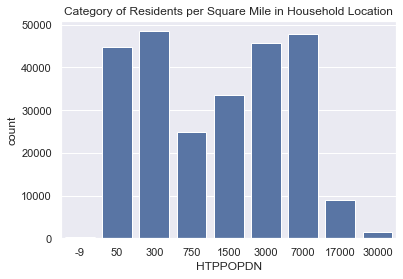

In [79]:
num_people = vehicle_df['HTPPOPDN'].value_counts().reset_index()
sns.barplot(data = num_people, x = 'HTPPOPDN', y = 'count')
plt.title('Category of Residents per Square Mile in Household Location')

Text(0.5, 1.0, 'Category of Housing Units per Square Mile in Census Tract of HH Location')

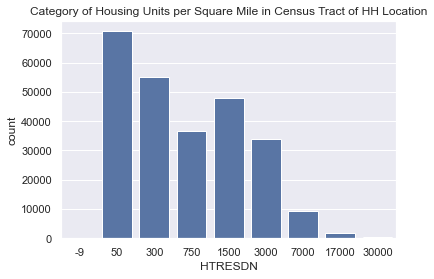

In [80]:
num_tract = vehicle_df['HTRESDN'].value_counts().reset_index()
sns.barplot(data = num_tract, x = 'HTRESDN', y = 'count')
plt.title('Category of Housing Units per Square Mile in Census Tract of HH Location')

## Bivariate Analysis

Does household income have a correlation with vehicle age? Do families with higher incomes purchase/drive newer cars?

Text(0.5, 1.0, 'Household Income versus Vehicle Age')

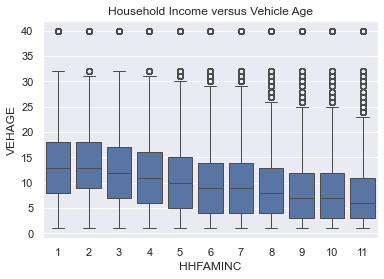

In [186]:
filtered = vehicle_df[(vehicle_df['VEHAGE'] > 0) & (vehicle_df['HHFAMINC'] > 0)]
sns.boxplot(data = filtered[['VEHAGE', 'HHFAMINC']], x= 'HHFAMINC', y = 'VEHAGE')
plt.title('Household Income versus Vehicle Age')

What are some of the most common vehicles that different households own?

Text(0.5, 0, 'Household Size')

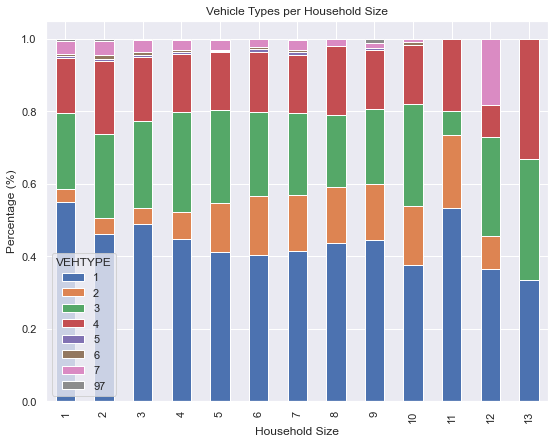

In [202]:
grouped = vehicle_df[vehicle_df['VEHTYPE']>0].groupby(['HHSIZE', 'VEHTYPE']).size().reset_index(name='count')
total = vehicle_df.groupby('HHSIZE').size()
total.name = 'total_veh'
grouped = grouped.merge(total, on = 'HHSIZE', how = 'left')
grouped['percentage'] = (grouped['count'] / grouped['total_veh'])
grouped.drop(columns = ['total_veh', 'count'], inplace = True)
grouped = grouped.pivot(index = 'HHSIZE', columns='VEHTYPE', values='percentage')
grouped.plot(kind = 'bar', stacked = True, figsize = (9,7))
plt.title('Vehicle Types per Household Size')
plt.ylabel('Percentage (%)')
plt.xlabel('Household Size')

Do tracts with different about of workers have higher annual miles? Are most workers driving over taking public transportation/walking?

(0.0, 100000.0)

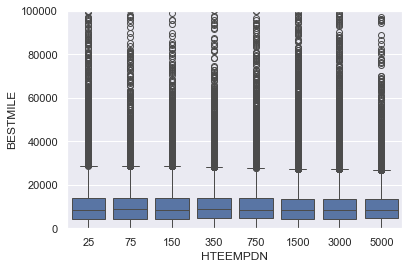

In [207]:
filtered_workers = vehicle_df[(vehicle_df['BESTMILE']>=0) & (vehicle_df['HTEEMPDN']>=0)]
sns.boxplot(data = filtered_workers, x = 'HTEEMPDN', y = 'BESTMILE')
plt.ylim(0, 100000)

## Multinomial Logit Model

In [1]:
#multinomial logit model

In [4]:
# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
# Best Mile, Life Cycle
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
print(Counter(y))
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)

(1000, 10) (1000,)
Counter({1: 334, 2: 334, 0: 332})


LogisticRegression(multi_class='multinomial')

In [5]:
# define a single row of input data
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# predict the class label
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [13]:
vehicle_df[['TRAVDAY']]

,TRAVDAY
0,2
1,2
2,2
3,2
4,2
...,...
256110,2
256111,2
256112,2
256113,2
